# Semana 9

## Sobre Umbrales y Metricas en problemas de clasificación, y desbalance de clases

* Umbral
* P-R Curve
* ROC / AUC
* Class weights

## Predecir progresión de cancer de mama

Vamos a usar un dataset compilado y donado por el Dr. William Wolberg de la Universidad de California at Irvine. Es de 1992 y ya hay mucho trabajo sobre uso de este dataset para desarrollar y evaluar algoritmos de predicción (ver referencias).

El dataset tiene:
Number of Samples: 569
Number of Features: 30 numeric, predictive attributes
Number of Classes: 2

Referencias:

 - Wolberg, William. (1992). Breast Cancer Wisconsin (Original). UCI Machine Learning Repository. [Original Wisconsin Breast Cancer Database](https://doi.org/10.24432/C5HP4Z).
 - O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.
 - William H. Wolberg and O.L. Mangasarian: "Multisurface method of pattern separation for medical diagnosis applied to breast cytology", Proceedings of the National Academy of Sciences, U.S.A., Volume 87, December 1990, pp 9193-9196.
 - O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition via linear programming: Theory and application to medical diagnosis", in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying Li, editors, SIAM Publications, Philadelphia 1990, pp 22-30.
 - K. P. Bennett & O. L. Mangasarian: "Robust linear programming discrimination of two linearly inseparable sets", Optimization Methods and Software 1, 1992, 23-34 (Gordon & Breach Science Publishers).

In [ ]:
# el dataset Wisconsin Breast Cancer (UCI) de Wolberg está en sklearn!
from sklearn import datasets

# sklearn.datasets nos trae los datos con una estructura particular
# sklearn los llama "bunchs"
# as_frame = True nos devuelve un dataframe pandas embebido en el bunch
wbc = datasets.load_breast_cancer(as_frame=True)

# y guardamos el dataframe
df = wbc.frame

In [ ]:
# los bunchs de sklearn son como diccionarios de python
# tienen sus propios metodos para acceder a la info
print(wbc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
# veamos las etiquetas de las clases (targets)
print(wbc.target_names)

# cual es la condicion de la etiqueta CERO?
print("Etiqueta 0 = ", wbc.target_names[0])

# y la UNO?
print("Etiqueta 1 = ", wbc.target_names[1])

['malignant' 'benign']
Etiqueta 0 =  malignant
Etiqueta 1 =  benign


Si quieren saber mas sobre otros datasets de sklearn (para jugar, aprender, experimentar) vean [sklearn datasets.](https://scikit-learn.org/stable/datasets.html#datasets)

In [ ]:
df.info

<bound method DataFrame.info of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean con

In [ ]:
df.shape

(569, 31)

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Como convención vamos a usar `x` para guardar los datos de nuestros features (variables), y vamos a mantener en forma separada el diagnóstico (Maligno, Benigno) en la variable `y`.

La variable `y`  por lo tanto tiene las etiquetas con las *clases* a las que pertenece cada muestra/paciente. Es nuestro **target** o sea lo que queremos aprender a predecir.

In [ ]:
# generamos nuestros vectores x (datos) -- copiamos el dataframe entero y le borramos la columna 'target' con las etiquetas
x = df.drop(['target'], axis=1)

# y nuestro vector y (etiquetas)
y = df['target']
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
x.shape

(569, 30)

In [ ]:
y.shape

(569,)

In [ ]:
y.tail()

564    0
565    0
566    0
567    0
568    1
Name: target, dtype: int64

## Aprendiendo a clasificar los datos

Ahora vamos a intentar aprender a partir de estos datos, y con eso vamos a intentar predecir para cada muestra, la etiqueta o clase a la que pertenece (maligno vs benigno), que va a ser nuestra predicción de pronóstico del cancer.

Como en ejemplos anteriores, vamos a usar cross-validation para entrenar el modelo con un conjunto de datos **independiente** y **differente** de los datos con los que vamos a evaluar el modelo (para no hacernos trampa).

In [ ]:
# normalizar / estandarizar / re-escalar datos
import numpy as np

from sklearn.preprocessing import MinMaxScaler
#n = (x - np.min(x, axis=0)) / ((np.max(x, axis=0)) - np.min(x, axis=0)).values
scaler = MinMaxScaler().fit(x)

# n son nuestros datos normalizados!
n = scaler.transform(x)


In [ ]:
from sklearn.model_selection import train_test_split

# notar que usamos n en lugar de x (datos normalizados!)
x_train, x_test, y_train, y_test = train_test_split(n, y, test_size=0.15, random_state=666)

In [ ]:
# veamos como fue la particion
print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (483, 30)
x test:  (86, 30)
y train:  (483,)
y test:  (86,)


In [ ]:
x_test

array([[0.55274741, 0.25059182, 0.53631401, ..., 0.57525773, 0.26197516,
        0.19362456],
       [0.27824317, 0.12208319, 0.26971184, ..., 0.39690722, 0.16104869,
        0.19998688],
       [0.21482323, 0.30571525, 0.20420151, ..., 0.21704467, 0.34318943,
        0.10048537],
       ...,
       [0.30238061, 0.22590463, 0.29237786, ..., 0.30852234, 0.09520993,
        0.13931523],
       [0.69709877, 0.25498816, 0.67106627, ..., 0.62542955, 0.18628031,
        0.06493506],
       [0.29764778, 0.1707812 , 0.28297975, ..., 0.34398625, 0.09107037,
        0.04604486]])

In [ ]:
y_test

121    0
322    1
55     1
89     1
317    0
      ..
25     0
6      0
124    1
368    0
92     1
Name: target, Length: 86, dtype: int64

Ahora entrenemos nuestro modelo logístico.

In [ ]:
from sklearn.linear_model import LogisticRegression

# y con esto vamos a entrenar
lr = LogisticRegression(penalty="l2")
lr.fit(x_train,y_train)

LogisticRegression()

Ya entrenamos el modelo con los datos *train* (`x_train`, `y_train`) ahora vamos a ver cuales son las predicciones para un conjunto de datos que el modelo no vió hasta ahora.

In [ ]:
# veamos como predice el conjunto de datos de validacion x_test
clasificacion = lr.predict(x_test)

In [ ]:
print(x_test.shape)
print(clasificacion.shape)

(86, 30)
(86,)


In [ ]:
clasificacion

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
print('Omega_0 = {:.2f}'.format(*lr.intercept_))
print('Omega_1 = {:.2f}'.format(lr.coef_[0][0]))
print('Omega_2 = {:.2f}'.format(lr.coef_[0][1]))
print("[...]")
print('Omega_29 = {:.2f}'.format(lr.coef_[0][29]))

Omega_0 = 9.02
Omega_1 = -1.91
Omega_2 = -1.58
[...]
Omega_29 = -0.30


<Axes: ylabel='Feature'>

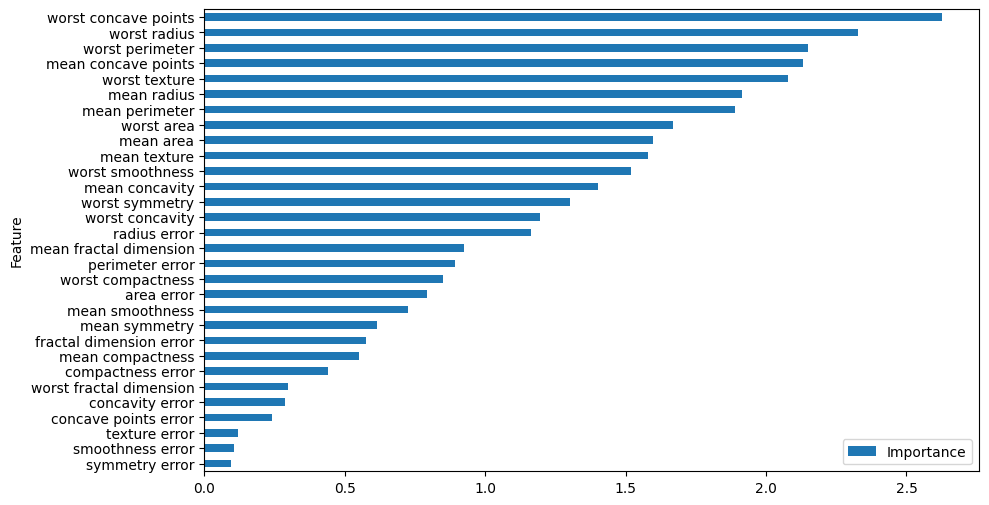

In [ ]:
coefficients = lr.coef_[0]
import pandas as pd
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

Y ahora comparemos las etiquetas de la clasificación (predicciones) con las etiquetas *verdaderas* del dataset .

In [ ]:
# y ahora comparemos y_test (validacion) vs prediccion
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

print(f"Exactitud: {round(accuracy_score(y_test, clasificacion), 3)}      (TP + TN / P + N)")
print(f"Precisión: {round(precision_score(y_test, clasificacion), 3)}      (TP / TP + FP)")
print(f"Exhaustividad: {round(recall_score(y_test, clasificacion), 3)}  (TP / TP + FN)")
print("\nMatriz de confusión:")
print(metrics.confusion_matrix(y_test, clasificacion))

Exactitud: 0.942      (TP + TN / P + N)
Precisión: 0.911      (TP / TP + FP)
Exhaustividad: 1.0  (TP / TP + FN)

Matriz de confusión:
[[30  5]
 [ 0 51]]


In [ ]:
# otra manera de evaluar la matrix de confusión
confusion = metrics.confusion_matrix(y_test, clasificacion)

 # verdaderos positivos, True Positive
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

TP: 51
TN: 30
FP: 5
FN: 0


Ahora calculemos las probabilidades y evaluemos las curvas ROC y la de Precision-Recall.

In [ ]:
# las probabilidades (scores) de los datos son estas:
probabilidades = lr.predict_proba(x_test)


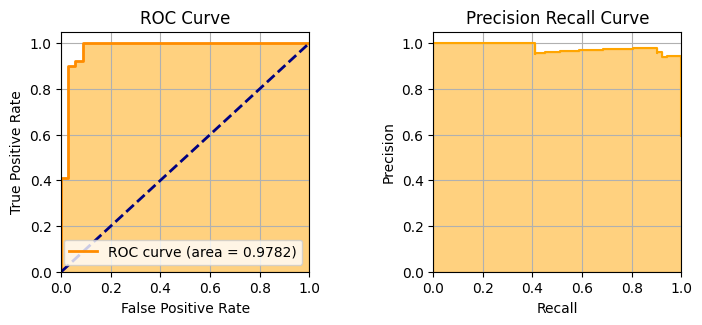

In [ ]:
#@title Plotear Curvas ROC + Precision-Recall

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# nos quedamos con las probabilidades positivas solamente
positive_probs = probabilidades[:, 1]

# Get ROC curve FPR and TPR from true labels vs score values
fpr, tpr, _ = roc_curve(y_test, positive_probs)

# Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
roc_auc = roc_auc_score(y_test, positive_probs)

# Calculate precision and recall from true labels vs score values
precision, recall, _ = precision_recall_curve(y_test, positive_probs)

plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.fill_between(fpr,tpr, step='post', alpha=0.5, color='orange')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(1,2,2)
plt.step(recall, precision, color='orange', where='post')
plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall Curve')
plt.grid(True)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.5   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
plt.show()

## Balance de los datos

Los datos del dataset Breast Cancer Wisconsin no están balanceados.

In [ ]:
# veamos cuan balanceado estaban nuestro dataset
print(y.value_counts())

# cual es el desbalance?
print("Malignant / Beningo:", y.value_counts()[0] / y.value_counts()[1])

1    357
0    212
Name: target, dtype: int64
Malignant / Beningo: 0.5938375350140056


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights

array([1.34198113, 0.79691877])

In [ ]:
# volvemos a entrenar el modelo, ahora con class_weights
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# preprocessing
scaler = MinMaxScaler().fit(x)

# n son nuestros datos normalizados!
n = scaler.transform(x)

# split entre train / test
#x_train, x_test, y_train, y_test = train_test_split(n, y, test_size = 0.15, random_state=21)
x_train, x_test, y_train, y_test = train_test_split(n, y, test_size=0.15, random_state=666)

#n_test = scaler.transform(x_test)

lr =  LogisticRegression(class_weight='balanced')
lr.fit(x_train, y_train)
clasificacion = lr.predict(x_test)
probabilidades = lr.predict_proba(x_test)


In [ ]:
# y ahora comparemos y_test (validacion) vs prediccion
from sklearn import metrics
print(metrics.accuracy_score(y_test, clasificacion))

0.9418604651162791


In [ ]:
print(metrics.confusion_matrix(y_test, clasificacion))

[[32  3]
 [ 2 49]]


In [ ]:
coeficientes = lr.coef_[0]
import pandas as pd
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': np.abs(coeficientes)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [ ]:
#@title Plotear Curvas ROC + Precision-Recall
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
# nos quedamos con las probabilidades positivas solamente
positive_probs = probabilidades[:, 1]


# Get ROC curve FPR and TPR from true labels vs score values
#fpr, tpr, _ = roc_curve(y, x)
fpr, tpr, _ = roc_curve(y_test, positive_probs)

# Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
#roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, positive_probs)

# Calculate precision and recall from true labels vs score values
precision, recall, _ = precision_recall_curve(y_test, positive_probs)

plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.fill_between(fpr,tpr, step='post', alpha=0.5, color='orange')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(1,2,2)
plt.step(recall, precision, color='orange', where='post')
plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall Curve')
plt.grid(True)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.5   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
plt.show()

## Apendice -- Jugar con separacion y desbalance entre clases

## Generamos nuestros datos

Vamos a generar dos clases con distribución normal (simétrica, gausiana). En ambos casos las clases muestran distribuciones _balanceadas_.

Para imaginar situaciones reales, piensen en que las dos clases pueden ser dos grupos de pacientes (enfermos, sanos). O dos grupos de estudiantes (universitarios _vs_ colegio secundario). O dos grupos de atletas entrenados para correr 100 metros (jamaiquinos _vs_ argentinos).

En cualquiera de estos ejemplos, contamos con el resultado numérico de algún un test nos va a permitir (con suerte) separar a estas dos clases. Por ejemplo: velocidad en que corren los 100metros (corredores), resultado de medir algun parámetro en sangre en un análisis bioquímico de laboratorio (pacientes), o resultado de la nota en un examen escrito o multiple choice (alumnos).

El test nos da un puntaje numérico con valores entre 0 y 10. En el caso de un examen escrito para estudiantes, no nos cuesta mucho imaginarlo. En el caso de tiempo en correr 100m (atletas) o en el caso de algun análisis diagnóstico de laboratorio, imaginemos que los puntajes fueron _normalizados_ o _re-escalados_ para que entren en este rango.

In [ ]:
# Setup | Preparación
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import norm
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [ ]:
# vmos a generar datos balanceados (10000 por lado)
N1 = 10000
media1 = 4
sigma1 = 1

N2 = 10000
media2 = 6
sigma2 = 1

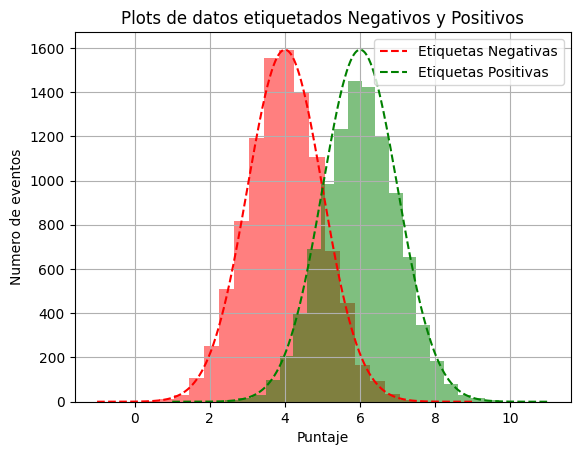

In [ ]:
#@title Generar Datos y Plotear Dataset
#
def distribucion_normal(media, sigma, N, bins, label, plt_color, is_plot=True):
  # simulamos puntajes con una distribucion a partir de la media, desvio y nro de datos (N)
  puntajes = np.sort(norm.rvs(loc=media, scale=sigma, size=N))

  # Curva Bell de Referencia
  x = np.linspace(-5, 5, N)
  # por defecto centrada en 0 y con desvio 1
  bell = norm.pdf(x) * N * max(norm.pdf(x))

  if is_plot:
    plt.hist(puntajes, density=False, color=plt_color, alpha=.5, bins=bins)
    plt.plot(x+media, bell, '--', label=label, color=plt_color)

  return puntajes, x, bell

BINS = 20

plt.figure()

# Distribucion de datos etiquetados como Negativos
label1 = 'Etiquetas Negativas'
puntajes1, x1, bell1 = distribucion_normal(media1, sigma1, N1, BINS, label1, plt_color='red')

label2 = 'Etiquetas Positivas'
puntajes2, x2, bell2 = distribucion_normal(media2, sigma2, N2, BINS, label2, plt_color='green')

# Finalmente generamos nuestros vectores x (datos) + y (etiquetas)
y = N1*[0] + N2*[1]

x = np.concatenate((puntajes1, puntajes2), axis=None).reshape(-1,1)

# Plot
plt.title("Plots de datos etiquetados Negativos y Positivos")
plt.xlabel('Puntaje')
plt.ylabel('Numero de eventos')
plt.grid(True)
plt.legend()
plt.show()

El código oculto nos genera datos en nuestros vectores `x`(datos, valores) e `y` (clases, etiquetas). Las etiquetas son: POSITIVO (`1`) o NEGATIVO (`0`). Y los puntajes son los valores numéricos que surjen de algún test. Con esta informacion entrenamos un modelo Logistico:

In [ ]:
# entrenar el modelo
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# con pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# split entre train / test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state=21)

pipe = Pipeline([
        ('scale', MinMaxScaler()),
        ('logistic_regression', LogisticRegression()),
        ])

pipe.fit(x_train, y_train)
clasificacion = pipe.predict(x_test)
probabilidades = pipe.predict_proba(x_test)


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

print(f"Exactitud: {round(accuracy_score(y_test, clasificacion), 3)}      (TP + TN / P + N)")
print(f"Precisión: {round(precision_score(y_test, clasificacion), 3)}      (TP / TP + FP)")
print(f"Exhaustividad: {round(recall_score(y_test, clasificacion), 3)}  (TP / TP + FN)")
print("\nMatriz de confusión:")
print(metrics.confusion_matrix(y_test, clasificacion))

Exactitud: 0.848      (TP + TN / P + N)
Precisión: 0.852      (TP / TP + FP)
Exhaustividad: 0.847  (TP / TP + FN)

Matriz de confusión:
[[1264  223]
 [ 232 1281]]


## Calculamos las probabilidades (scores)

In [ ]:
# las probabilidades (scores) de los datos son estas:
probabilidades = pipe.predict_proba(x_test)

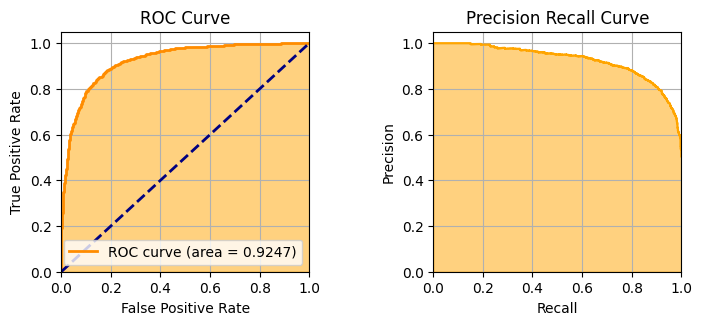

In [ ]:
#@title Plotear Curvas ROC + Precision-Recall
from sklearn.metrics import roc_auc_score
# nos quedamos solo con las probabilidades de los eventos positivos
positive_probs = probabilidades[:, 1]

# Get ROC curve FPR and TPR from true labels vs score values
#fpr, tpr, _ = roc_curve(y, x)
fpr, tpr, _ = roc_curve(y_test, positive_probs)

# Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
#roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, positive_probs)

# Calculate precision and recall from true labels vs score values
precision, recall, _ = precision_recall_curve(y_test, positive_probs)

plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.fill_between(fpr,tpr, step='post', alpha=0.5, color='orange')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(1,2,2)
plt.step(recall, precision, color='orange', where='post')
plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall Curve')
plt.grid(True)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.5   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
plt.show()

In [ ]:
# generar una prediccion tonta
# a todo el conjunto de testeo / validacion le asignamos probabilidad 0
# (o 1, da igual)
positive_probs = [0.8 for _ in range(len(y_test))]

# Desbalanceo de datos



In [ ]:
# datos desbalanceados
N1 = 10000
media1 = -1
sigma1 = 1

N2 = 3000
media2 = 1
sigma2 = 1

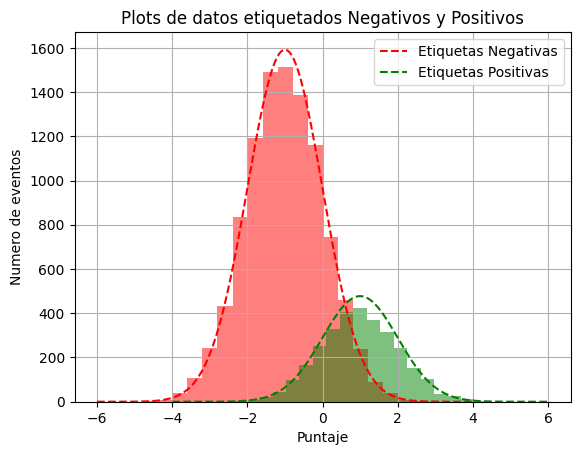

In [ ]:
#@title Generar Datos y Plotear Dataset
#
def distribucion_normal(media, sigma, N, bins, label, plt_color, is_plot=True):
  # simulamos puntajes con una distribucion a partir de la media, desvio y nro de datos (N)
  puntajes = np.sort(norm.rvs(loc=media, scale=sigma, size=N))

  # Curva Bell de Referencia
  x = np.linspace(-5, 5, N)
  # por defecto centrada en 0 y con desvio 1
  bell = norm.pdf(x) * N * max(norm.pdf(x))

  if is_plot:
    plt.hist(puntajes, density=False, color=plt_color, alpha=.5, bins=bins)
    plt.plot(x+media, bell, '--', label=label, color=plt_color)

  return puntajes, x, bell

BINS = 20

plt.figure()

# Distribucion de datos etiquetados como Negativos
label1 = 'Etiquetas Negativas'
puntajes1, x1, bell1 = distribucion_normal(media1, sigma1, N1, BINS, label1, plt_color='red')

label2 = 'Etiquetas Positivas'
puntajes2, x2, bell2 = distribucion_normal(media2, sigma2, N2, BINS, label2, plt_color='green')

# Finalmente generamos nuestros vectores x (datos) + y (etiquetas)
y = N1*[0] + N2*[1]

x = np.concatenate((puntajes1, puntajes2), axis=None).reshape(-1,1)

# Plot
plt.title("Plots de datos etiquetados Negativos y Positivos")
plt.xlabel('Puntaje')
plt.ylabel('Numero de eventos')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# entrenar el modelo
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# con pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# split entre train / test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state=21)

pipe = Pipeline([
        ('scale', MinMaxScaler()),
        ('logistic_regression', LogisticRegression()),
        ])

pipe.fit(x_train, y_train)
clasificacion = pipe.predict(x_test)
probabilidades = pipe.predict_proba(x_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

print(f"Exactitud: {round(accuracy_score(y_test, clasificacion), 3)}      (TP + TN / P + N)")
print(f"Precisión: {round(precision_score(y_test, clasificacion), 3)}      (TP / TP + FP)")
print(f"Exhaustividad: {round(recall_score(y_test, clasificacion), 3)}  (TP / TP + FN)")
print("\nMatriz de confusión:")
print(metrics.confusion_matrix(y_test, clasificacion))

Exactitud: 0.867      (TP + TN / P + N)
Precisión: 0.782      (TP / TP + FP)
Exhaustividad: 0.605  (TP / TP + FN)

Matriz de confusión:
[[1411   78]
 [ 182  279]]


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights

array([0.65      , 2.16666667])

In [ ]:
# volvemos a entrenar el modelo, ahora con class_weights
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# con pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# split entre train / test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state=21)

pipe = Pipeline([
        ('scale', MinMaxScaler()),
        ('logistic_regression', LogisticRegression(class_weight='balanced')),
        ])

pipe.fit(x_train, y_train)
clasificacion = pipe.predict(x_test)
probabilidades = pipe.predict_proba(x_test)



In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

print(f"Exactitud: {round(accuracy_score(y_test, clasificacion), 3)}      (TP + TN / P + N)")
print(f"Precisión: {round(precision_score(y_test, clasificacion), 3)}      (TP / TP + FP)")
print(f"Exhaustividad: {round(recall_score(y_test, clasificacion), 3)}  (TP / TP + FN)")
print("\nMatriz de confusión:")
print(metrics.confusion_matrix(y_test, clasificacion))

In [ ]:
#@title Plotear Curvas ROC + Precision-Recall

# nos quedamos solo con las probabilidades de los eventos positivos
positive_probs = probabilidades[:, 1]

# Get ROC curve FPR and TPR from true labels vs score values
#fpr, tpr, _ = roc_curve(y, x)
fpr, tpr, _ = roc_curve(y_test, positive_probs)

# Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
#roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, positive_probs)

# Calculate precision and recall from true labels vs score values
precision, recall, _ = precision_recall_curve(y_test, positive_probs)

plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.fill_between(fpr,tpr, step='post', alpha=0.5, color='orange')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(1,2,2)
plt.step(recall, precision, color='orange', where='post')
plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall Curve')
plt.grid(True)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.5   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
plt.show()

In [ ]:
#@title Plotear Curvas ROC + Precision-Recall
from sklearn.metrics import roc_auc_score
# nos quedamos solo con las probabilidades de los eventos positivos
positive_probs = probabilidades[:, 1]

# Get ROC curve FPR and TPR from true labels vs score values
#fpr, tpr, _ = roc_curve(y, x)
fpr, tpr, _ = roc_curve(y_test, positive_probs)

# Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
#roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, positive_probs)

# Calculate precision and recall from true labels vs score values
precision, recall, _ = precision_recall_curve(y_test, positive_probs)

plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.fill_between(fpr,tpr, step='post', alpha=0.5, color='orange')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(1,2,2)
plt.step(recall, precision, color='orange', where='post')
plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall Curve')
plt.grid(True)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.5   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
plt.show()